## 分析角度

### 受访者基本情况
1. 性别比例
2. 年龄分别（18-30）
3. 学历分步
4. 职业分布
5. 收入分布

### 平台使用者现状
1. 使用中，买家/卖家

#### 买家
1. 买家购买的二手商品种类分布
2. 买家关注因素

#### 卖家
1. 卖家身份分布
2. 卖家售卖商品种类分布
3. 动机分布

### 未使用者基本情况
1. 是否有需求分布
2. 是否知道分布


## 受访者情况分析


In [1]:
import pandas as pd
import csv

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import numpy
import scipy

plt.rcParams['font.sans-serif'] = ['SimHei']  # 例如使用 SimHei (黑体)
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题
excel_path = '../data/全部问卷信息.xlsx'
df_buyers = pd.read_excel(excel_path, sheet_name='买家重编码')
df_sellers = pd.read_excel(excel_path, sheet_name='卖家重编码')
df_unused = pd.read_excel(excel_path, sheet_name='未使用重编码')

print("买家数据形状: ", df_buyers.shape)
print("卖家数据形状: ", df_sellers.shape)
print("未使用二手平台的受调查者数据形状: ", df_unused.shape)
print("------------------------------------------------------------------")

display("买家数据前5行: ", df_buyers.head())
print("------------------------------------------------------------------")
display("卖家数据前5行: ", df_sellers.head())
print("------------------------------------------------------------------")
display("未使用二手平台的受调查者数据前5行: ", df_unused.head())

买家数据形状:  (448, 51)
卖家数据形状:  (158, 53)
未使用二手平台的受调查者数据形状:  (123, 17)
------------------------------------------------------------------


'买家数据前5行: '

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,1、您的性别为：,2、您的年龄为：,3、您的学历为：,...,23、店铺信誉造假、商品销量与评论造假等商品风险问题是否会影响您的购买决策？,24、您是否遇到过平台上商品信息与实际收到商品严重不符的情形？,25、您认为平台通过哪些方式可以减小交易风险？,25、建立买卖双方交易信誉记录,25、交易前缴纳适额保证金,25、建立商品评级标准,26、对于平台现有的纠纷处理时间周期，您是否满意？,27、平台提供的商品筛选功能是否满足您的需求？,28、您在使用二手平台购物的过程中，最满意/不满意的一次购物经历1怎样的？交易过程中让您感到满意/不满意的因素1什么？,29、您对二手平台的改进有哪些期望？
0,2,2025/2/5 21:28:25,134秒,手机提交,直接访问,223.104.72.229(广东-中山),20,0,50,3,...,3,3,建立买卖双方交易信誉记录,1,0,0,3,3,NaN,NaN
1,7,2025/2/5 21:34:33,86秒,手机提交,直接访问,42.229.253.203(河南-南阳),28,1,19,3,...,3,3,建立买卖双方交易信誉记录┋交易前缴纳适额保证金┋建立商品评级标准,1,1,1,3,3,NaN,NaN
2,9,2025/2/5 21:36:57,72秒,手机提交,直接访问,42.49.217.186(湖南-益阳),19,0,19,2,...,3,4,建立买卖双方交易信誉记录┋交易前缴纳适额保证金┋建立商品评级标准,1,1,1,3,2,NaN,NaN
3,12,2025/2/5 21:45:49,125秒,手机提交,直接访问,112.18.125.150(四川-遂宁),26,1,18,3,...,5,2,建立买卖双方交易信誉记录┋建立商品评级标准,1,0,1,3,3,NaN,NaN
4,13,2025/2/5 21:46:19,87秒,微信,NaN,140.243.1.212(福建-厦门),25,1,20,2,...,5,2,建立买卖双方交易信誉记录┋交易前缴纳适额保证金┋建立商品评级标准,1,1,1,4,4,NaN,NaN


------------------------------------------------------------------


'卖家数据前5行: '

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,1、您的性别为：,2、您的年龄为：,3、您的学历为：,...,37、您认为平台可以通过哪些措施来提高买家的信任，从而提升您的销售转化率？,38、二手平台收取服务费上涨，您认为这对您的交易意愿有何影响？,39、假设您发现另一个收费更低，服务相似或更优的平台，您是否会考虑转移到该平台？,40、您做出销售决策时，最重要的决定因素是什么？,41、您在做销售决策时，平台能否提供需要的辅助决策工具？,42、您在进行销售决策时会考虑通过什么方式吸引潜在买家？,43、您是否觉得平台为你的商品提供了合适的曝光度？,44、您在交易过程中遇到过哪些问题？,45、您是否觉得平台在交易环节的监管自由度合适？,46、您最希望平台在哪些方面进行改进？
0,4,2025/2/5 21:32:01,195秒,手机提交,直接访问,117.136.98.146(广西-柳州),0,0,19,3,...,放宽对违规词的限制，增加普通商品曝光率→认证商品，如序列号、生产日期、型号等→加强对出售伪劣...,部分影响，理解收费上涨，但会重新评估交易频率和价格策略,转移意向高，继续留存需要平台提供额外的补偿或激励,买家信誉→交易安全性→价格→平台服务,平台依据商品提供参考价格,价格优惠，低于同类产品,否，我觉得曝光度不够，商品很少被浏览,买家频繁砍价且议价幅度大,是，我觉得监管自由度适中，保障了交易安全且操作便捷,平台与专门快递公司合作，便利卖家发货→加强客服处理纠纷的能力→适度减少服务费，对大额交易设定...
1,24,2025/2/5 22:21:23,141秒,微信,NaN,111.49.148.112(宁夏-固原),0,0,19,3,...,放宽对违规词的限制，增加普通商品曝光率→认证商品，如序列号、生产日期、型号等→加强对出售伪劣...,部分影响，理解收费上涨，但会重新评估交易频率和价格策略,会立即转移，并减少在现平台的交易,买家信誉→平台服务→交易安全性→价格,以上都没有,价格优惠，低于同类产品,部分商品曝光度足够，但部分商品几乎没有浏览量,买家频繁砍价且议价幅度大,是，我觉得监管自由度适中，保障了交易安全且操作便捷,完善买卖双方的信誉系统，加大对逃单用户的惩罚力度
2,27,2025/2/5 23:30:20,174秒,微信,NaN,171.82.58.121(湖北-武汉),0,0,无,5,...,加强对出售伪劣产品等不诚信卖家的惩罚机制→完善客服服务，妥善处理买卖双方的矛盾→放宽对违规词...,严重影响，由于收费上涨产生对平台的不满，考虑停止交易或转移平台,转移意向低，现平台已建立足够的客户基础，且提供的服务较为满意,买家信誉→平台服务→价格→交易安全性,平台提供买家的信用记录┋平台依据商品提供参考价格,价格优惠，低于同类产品┋针对买家的关注点，详细阐明物品情况,是，我觉得曝光度足够，商品能被充分浏览,买家频繁砍价且议价幅度大┋买家付款后迟迟不确认收货┋售后争议处理不公平┋以上都没有,否，我觉得监管过于宽松，容易导致买卖双方的不诚信行为（如欺诈、恶意退货等）,平台与专门快递公司合作，便利卖家发货→平台提供捐赠或者环保回收的渠道→适度减少服务费，对大额...
3,30,2025/2/5 23:30:51,202秒,微信,NaN,117.152.75.128(湖北-武汉),0,0,无,3,...,放宽对违规词的限制，增加普通商品曝光率→加强对出售伪劣产品等不诚信卖家的惩罚机制→平台给买家...,较大影响，觉得平台收费过度上涨，会减少交易量,转移意向低，现平台已建立足够的客户基础，且提供的服务较为满意,交易安全性→平台服务→买家信誉→价格,平台提供买家的信用记录┋平台依据商品提供参考价格┋长时间无法售出，平台会询问是否要打折出售┋...,价格优惠，低于同类产品┋通过其他社交媒体宣传┋包装物品，使之更有吸引力┋针对买家的关注点，详...,部分商品曝光度足够，但部分商品几乎没有浏览量,买家频繁砍价且议价幅度大┋买家付款后迟迟不确认收货┋商品被恶意退货或差评┋平台抽佣或手续费过...,否，我觉得监管过于严格，限制了交易的灵活性,完善买卖双方的信誉系统，加大对逃单用户的惩罚力度→平台提供捐赠或者环保回收的渠道→加强客服处...
4,35,2025/2/5 23:31:46,339秒,微信,NaN,27.19.188.254(湖北-武汉),0,1,无,2,...,加强对出售伪劣产品等不诚信卖家的惩罚机制→认证商品，如序列号、生产日期、型号等→放宽对违规词...,较大影响，觉得平台收费过度上涨，会减少交易量,转移意向低，现平台已建立足够的客户基础，且提供的服务较为满意,平台服务→价格→买家信誉→交易安全性,平台提供买家的信用记录┋平台依据商品提供参考价格┋以上都没有,价格优惠，低于同类产品┋通过其他社交媒体宣传┋包装物品，使之更有吸引力┋针对买家的关注点，详...,否，我觉得曝光度不够，商品很少被浏览,买家频繁砍价且议价幅度大┋买家付款后迟迟不确认收货┋商品被恶意退货或差评┋平台抽佣或手续费过...,否，我觉得监管过于严格，限制了交易的灵活性,平台与专门快递公司合作，便利卖家发货→平台提供捐赠或者环保回收的渠道→增加对卖家的帮助，如定...


------------------------------------------------------------------


'未使用二手平台的受调查者数据前5行: '

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,1、您的性别为：,2、您的年龄为：,3、您的学历为：,4、您目前从事的职业为：,5、您的月收入区间为：,6、您是否使用过二手交易平台？,7、您是否有转让或出售闲置物品的需求？,8、您是否知道一些常见的二手平台？（如闲鱼、转转等）,9、您不使用二手平台的原因是什么？,10、您认为平台做出哪些改进之后，您最可能会尝试使用二手交易平台？
0,1,2025/2/5 21:26:57,52秒,手机提交,直接访问,223.104.121.64(湖北-武汉),0,0,17,3,1,1,否,是,是,不熟悉二手平台的交易流程┋担心商品质量问题┋售后保障方面的担忧,加强商品质量、来源监管→提供更方便的物流服务→建立完善的买卖纠纷处理通道
1,3,2025/2/5 21:30:03,37秒,手机提交,直接访问,171.40.117.240(湖北-孝感),0,0,19,2,1,2,否,是,是,更倾向于购买全新的产品┋不熟悉二手平台的交易流程┋通过qq等其他渠道进行交易,加强用户信息安全保护→加强商品质量、来源监管→建立完善的买卖纠纷处理通道→完善买卖双方信用机...
2,5,2025/2/5 21:32:18,21秒,手机提交,直接访问,59.174.126.64(湖北-武汉),0,1,18,3,1,1,否,是,是,更倾向于购买全新的产品┋担心商品质量问题,建立完善的买卖纠纷处理通道
3,6,2025/2/5 21:32:45,134秒,手机提交,直接访问,223.104.122.248(湖北-武汉),0,1,18,3,1,1,否,是,是,不熟悉二手平台的交易流程,完善买卖双方信用机制→加强用户信息安全保护→加强商品质量、来源监管→提供价格优惠→建立完善的...
4,8,2025/2/5 21:35:32,39秒,手机提交,直接访问,42.229.253.203(河南-南阳),0,1,19,3,1,1,否,是,是,更倾向于购买全新的产品┋担心商品质量问题┋价格吸引力不足┋售后保障方面的担忧┋缺少信任的品牌或平台,加强用户信息安全保护→提供价格优惠→加强商品质量、来源监管→建立完善的买卖纠纷处理通道→提供...


In [2]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = (
        df[["所用时间", "1、您的性别为：", "2、您的年龄为：", "3、您的学历为：", "4、您目前从事的职业为：",
            "5、您的月收入区间为：", "6、您是否使用过二手交易平台？"]].rename(
            columns={"所用时间": "用时",
                     "1、您的性别为：": "性别",
                     "2、您的年龄为：": "年龄",
                     "3、您的学历为：": "学历",
                     "4、您目前从事的职业为：": "职业",
                     "5、您的月收入区间为：": "收入",
                     "6、您是否使用过二手交易平台？": "是否使用过二手交易平台"
                     }
        ).dropna()
    )
    # 用时单位默认是秒，转成int类型便于画图
    df.iloc[:, 0] = df.iloc[:, 0].str[:-1].astype(int)
    
    # 清洗年龄数据
    df = df[(df['年龄'] != '没有') & (df['年龄'] != '无') & (df['年龄'] != '?TG there and the tfujn')]
    # Z世代大概是17-30岁
    df = df[(17 <= df['年龄'].astype(int)) & (df['年龄'].astype(int) <= 30)]

    return df

df_unused = preprocess(df_unused)
df_buyers = preprocess(df_buyers)
df_sellers = preprocess(df_sellers)
print("------------------------------------------------------------------")
display("未使用二手平台的受调查者数据前5行: ", df_unused.head())
print("------------------------------------------------------------------")
display("买家数据前5行: ", df_buyers.head())
print("------------------------------------------------------------------")
display("卖家数据前5行: ", df_sellers.head())

------------------------------------------------------------------


'未使用二手平台的受调查者数据前5行: '

,用时,性别,年龄,学历,职业,收入,是否使用过二手交易平台
0,52,0,17,3,1,1,否
1,37,0,19,2,1,2,否
2,21,1,18,3,1,1,否
3,134,1,18,3,1,1,否
4,39,1,19,3,1,1,否


------------------------------------------------------------------


'买家数据前5行: '

,用时,性别,年龄,学历,职业,收入,是否使用过二手交易平台
1,86,1,19,3,1,1,1
2,72,0,19,2,1,1,1
3,125,1,18,3,1,1,1
4,87,1,20,2,1,2,1
5,106,0,19,3,1,2,1


------------------------------------------------------------------


'卖家数据前5行: '

,用时,性别,年龄,学历,职业,收入,是否使用过二手交易平台
0,195,0,19,3,1,1,1
1,141,0,19,3,1,1,1
11,186,1,29,2,3,4,1
12,186,1,26,3,4,2,1
13,285,1,21,3,2,4,1


In [3]:
df_buyers = df_buyers.rename(columns={"是否使用过二手交易平台" : "身份"})
df_sellers = df_sellers.rename(columns={"是否使用过二手交易平台" : "身份"})
df_unused = df_unused.rename(columns={"是否使用过二手交易平台" : "身份"})

# 编码身份，0为买家，1为卖家，2为未使用
df_buyers["身份"] = 0
df_sellers["身份"] = 1
df_unused["身份"] = 2

df_full = pd.concat([df_buyers, df_sellers, df_unused], ignore_index=True)

df_full = pd.get_dummies(df_full, columns=["身份"], prefix="身份")
df_full.rename(columns={"身份_0": "买家", "身份_1": "卖家", "身份_2": "未使用"}, inplace=True)
df_full

,用时,性别,年龄,学历,职业,收入,买家,卖家,未使用
0,86,1,19,3,1,1,True,False,False
1,72,0,19,2,1,1,True,False,False
2,125,1,18,3,1,1,True,False,False
3,87,1,20,2,1,2,True,False,False
4,106,0,19,3,1,2,True,False,False
...,...,...,...,...,...,...,...,...,...
636,109,1,29,2,2,3,False,False,True
637,210,0,24,1,2,5,False,False,True
638,141,1,24,3,2,6,False,False,True
639,153,0,28,2,2,2,False,False,True


In [24]:
# 计算使用和未使用的数量
usage_counts = df_full[['买家', '卖家', '未使用']].sum()
print("使用/未使用情况:")
print(usage_counts)
print("------------------------------------------------------------------")
usage_percentages = usage_counts / usage_counts.sum() * 100
print("使用/未使用情况百分比:")
print(usage_percentages)

# 数据准备
labels = ['买家', '卖家', '未使用']
values = [388, 142, 111]

# 创建柱状图
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])

# 添加标题和标签
plt.title('买家、卖家和未使用人数统计')
plt.ylabel('人数')
plt.xlabel('类别')

# 在柱状图上显示具体数值
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

# 显示图表
plt.tight_layout()
plt.show()

使用/未使用情况:
买家     388
卖家     142
未使用    111
dtype: int64
------------------------------------------------------------------
使用/未使用情况百分比:
买家     60.530421
卖家     22.152886
未使用    17.316693
dtype: float64


In [25]:
# 计算性别比例
gender_ratio = df_full['性别'].value_counts(normalize=True) * 100
print("\n性别比例（%）:")
print(gender_ratio)



性别比例（%）:
性别
0    52.886115
1    47.113885
Name: proportion, dtype: float64


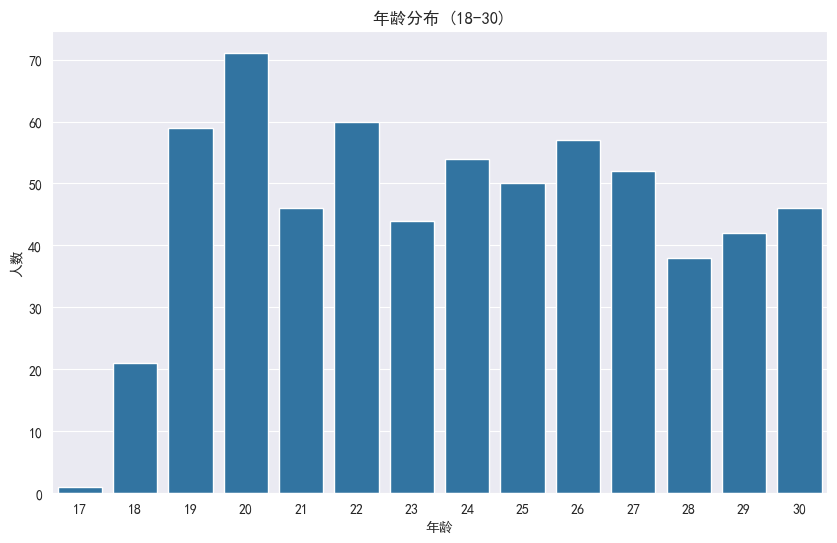

In [34]:
# 统计年龄分布
df_age_dist = pd.DataFrame({
    '年龄': df_full['年龄'].sort_values(),
})

# 可视化年龄分布
plt.figure(figsize=(10, 6))
sns.countplot(data=df_age_dist, x='年龄')
plt.title('年龄分布 (18-30)')
plt.xlabel('年龄')
plt.ylabel('人数')
plt.show()


学历分布:
学历
1    100
2    156
3    311
4     63
5     11
Name: count, dtype: int64


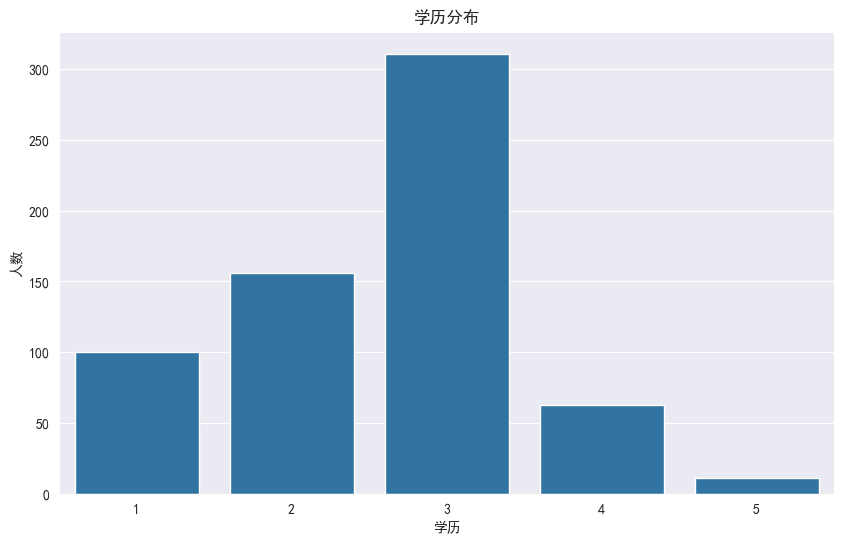

In [36]:
# 统计学历分布
education_distribution = df_full['学历'].value_counts().sort_index()
print("\n学历分布:")
print(education_distribution)

# 可视化学历分布
plt.figure(figsize=(10, 6))
sns.countplot(data=df_full, x='学历')
plt.title('学历分布')
plt.xlabel('学历')
plt.ylabel('人数')
plt.show()



职业分布:
职业
1    190
2    341
3     82
4     28
Name: count, dtype: int64


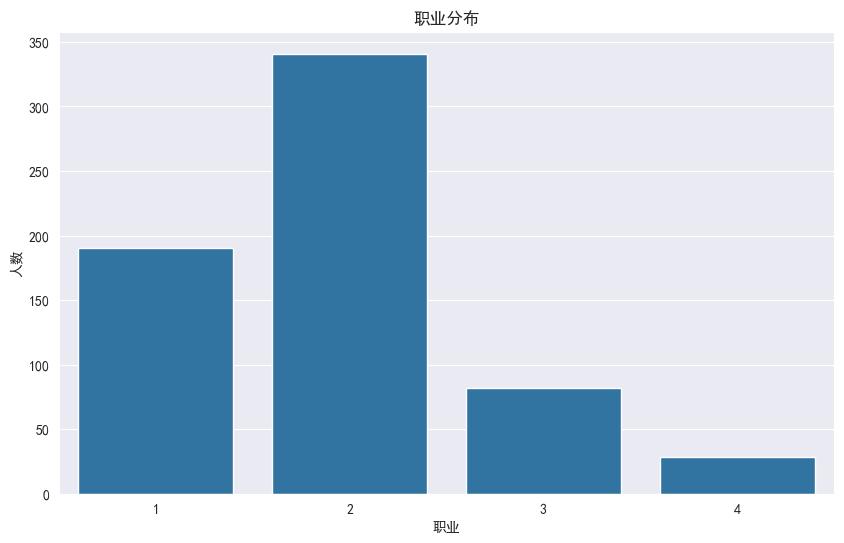

In [37]:
# 统计职业分布
occupation_distribution = df_full['职业'].value_counts().sort_index()
print("\n职业分布:")
print(occupation_distribution)

# 可视化职业分布
plt.figure(figsize=(10, 6))
sns.countplot(data=df_full, x='职业')
plt.title('职业分布')
plt.xlabel('职业')
plt.ylabel('人数')
plt.show()



收入分布:
收入
1     59
2    155
3    152
4    157
5     77
6     26
7     15
Name: count, dtype: int64


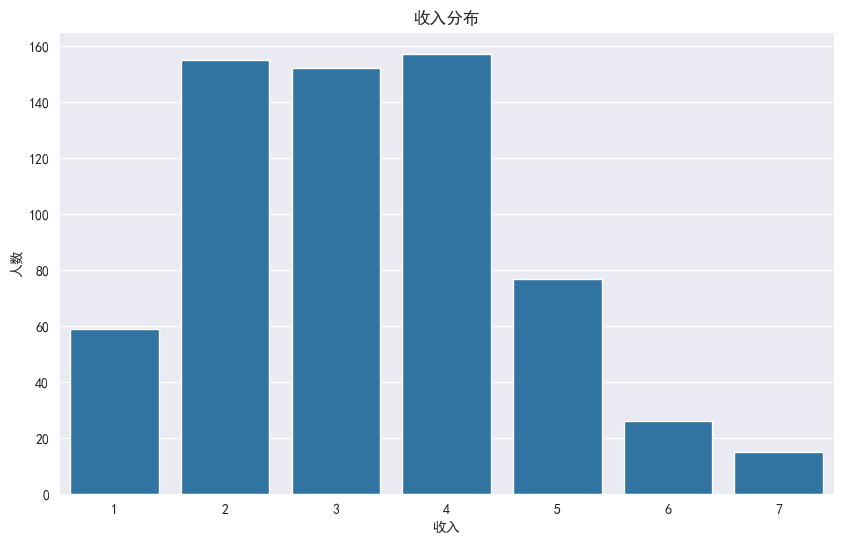

In [38]:
# 统计收入分布
income_distribution = df_full['收入'].value_counts().sort_index()
print("\n收入分布:")
print(income_distribution)

# 可视化收入分布
plt.figure(figsize=(10, 6))
sns.countplot(data=df_full, x='收入')
plt.title('收入分布')
plt.xlabel('收入')
plt.ylabel('人数')
plt.show()


使用/未使用情况:
买家     388
卖家     142
未使用    111
dtype: int64

性别比例（%）:
性别
0    52.886115
1    47.113885
Name: proportion, dtype: float64

年龄分布 (18-30):
年龄
17     1
18    21
19    59
20    71
21    46
22    60
23    44
24    54
25    50
26    57
27    52
28    38
29    42
30    46
Name: count, dtype: int64


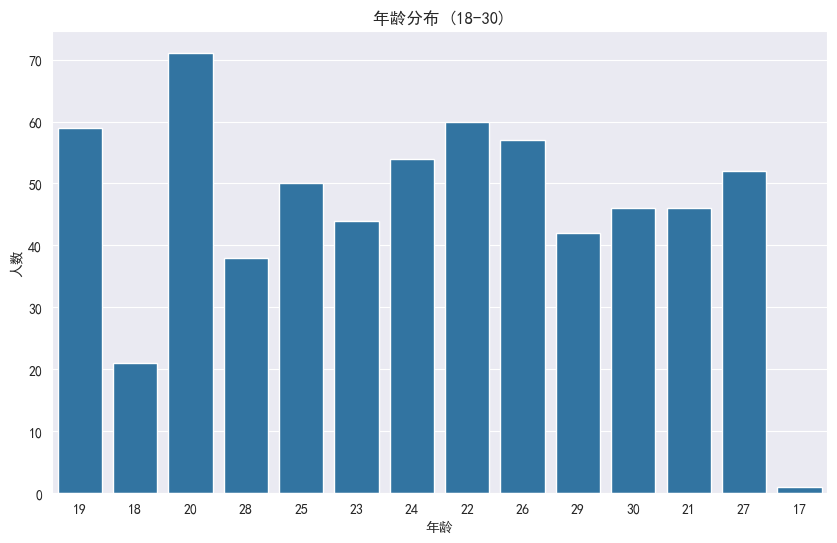


学历分布:
学历
1    100
2    156
3    311
4     63
5     11
Name: count, dtype: int64


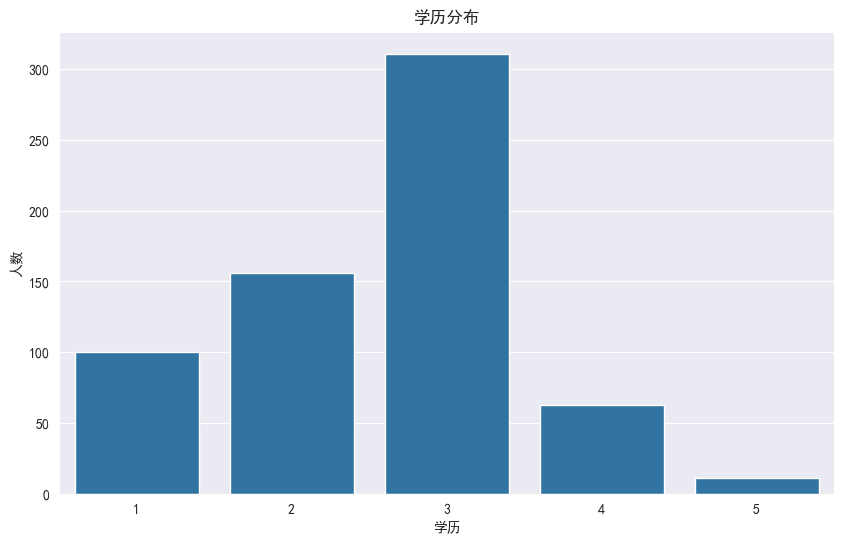


职业分布:
职业
1    190
2    341
3     82
4     28
Name: count, dtype: int64


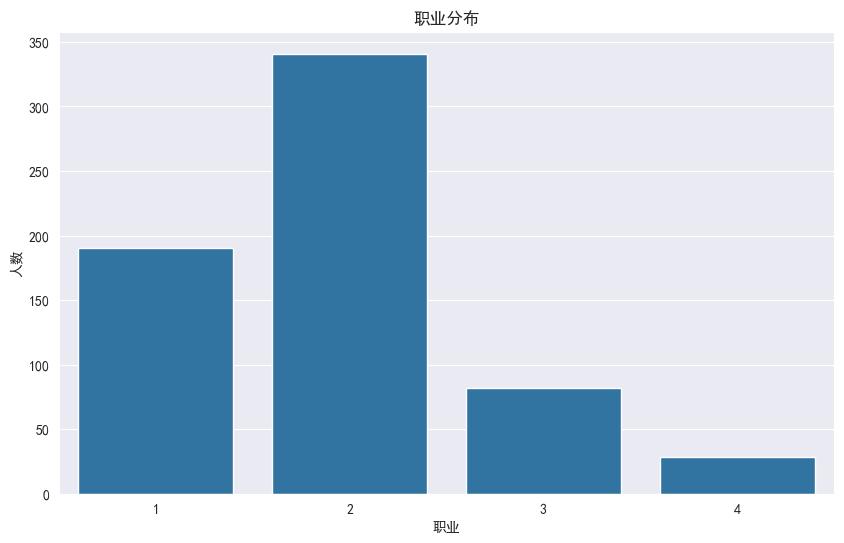


收入分布:
收入
1     59
2    155
3    152
4    157
5     77
6     26
7     15
Name: count, dtype: int64


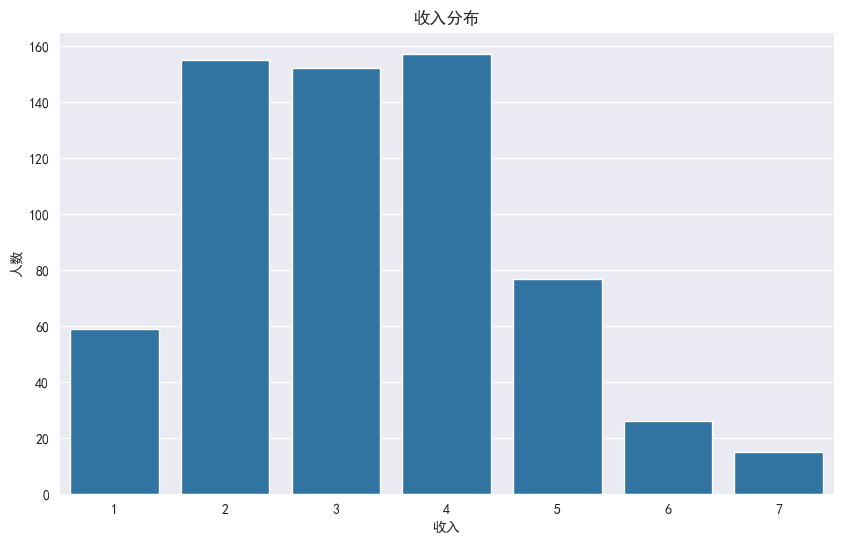